In [1]:
#Import all required libraries as below

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import Skyserver data files using pandas

df=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Absenteeism_at_work_AAA/Absenteeism_at_work.xls")
df.head()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
0,11,26,7,3,1,289,36,13,33,239554,...,1,1,2,1,1,1,90,172,30,4
1,36,20,7,3,1,118,13,18,50,239554,...,1,1,1,1,1,1,98,178,31,7
2,3,23,7,4,1,179,51,18,38,239554,...,1,1,1,1,1,1,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,1,1,2,1,1,1,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,1,1,2,1,1,1,90,172,30,2


In [3]:
# replace NaN values
import numpy as np

df['Reasonforabsence'].replace(np.NaN , df['Reasonforabsence'].mean,inplace=True)
df['Monthofabsence'].replace(np.NaN , df['Monthofabsence'].mean,inplace=True)
df['Son'].replace(np.NaN , df['Son'].mean,inplace=True)
df['Pet'].replace(np.NaN , df['Pet'].mean,inplace=True)
df['Absenteeismtimeinhours'].replace(np.NaN , df['Absenteeismtimeinhours'].mean,inplace=True)

In [4]:
df.tail()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
735,11,14,7,3,1,289,36,13,33,264604,...,1,1,2,1,1,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,1,3,1,1,1,1,88,172,29,4
737,4,20,6,3,1,118,14,13,40,271219,...,1,1,1,1,1,8,98,170,34,7
738,8,20,6,4,2,231,35,14,39,271219,...,1,1,2,1,1,2,100,170,35,7
739,35,20,6,6,3,179,45,14,53,271219,...,1,1,1,1,1,1,77,175,25,7


# Data Statistics

In [5]:
#Checking not null values & data types for all columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           740 non-null    int64
 1   Reasonforabsence             740 non-null    int64
 2   Monthofabsence               740 non-null    int64
 3   Dayoftheweek                 740 non-null    int64
 4   Seasons                      740 non-null    int64
 5   Transportationexpense        740 non-null    int64
 6   DistancefromResidencetoWork  740 non-null    int64
 7   Servicetime                  740 non-null    int64
 8   Age                          740 non-null    int64
 9   WorkloadAverage/day          740 non-null    int64
 10  Hittarget                    740 non-null    int64
 11  Disciplinaryfailure          740 non-null    int64
 12  Education                    740 non-null    int64
 13  Son                          740 non-null    int64

Above stats shows that all column in dataset are of integer datatype & null not present at all.

In [6]:
list(df.columns.values)

['ID',
 'Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Transportationexpense',
 'DistancefromResidencetoWork',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet',
 'Weight',
 'Height',
 'Bodymassindex',
 'Absenteeismtimeinhours']

In [7]:
df.describe()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.0,740.000000,740.000000,740.0,740.0,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.378378,6.348649,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,1.0,1.291892,1.421622,1.0,1.0,1.367568,79.035135,172.114865,26.677027,7.340541
std,11.021247,6.951217,3.412555,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.0,0.673238,0.791065,0.0,0.0,1.022098,12.883211,6.034995,4.285452,13.216946
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,1.0,1.000000,1.000000,1.0,1.0,1.000000,56.000000,163.000000,19.000000,1.000000
25%,9.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,1.0,1.000000,1.000000,1.0,1.0,1.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,1.0,1.000000,1.000000,1.0,1.0,1.000000,83.000000,170.000000,25.000000,4.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,1.0,1.000000,2.000000,1.0,1.0,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.0,4.000000,4.000000,1.0,1.0,8.000000,108.000000,196.000000,38.000000,120.000000


Above stats shows that target value is interger for column 'Absenteeism time in hours' , Hence need to train this model with Linear Rgression 

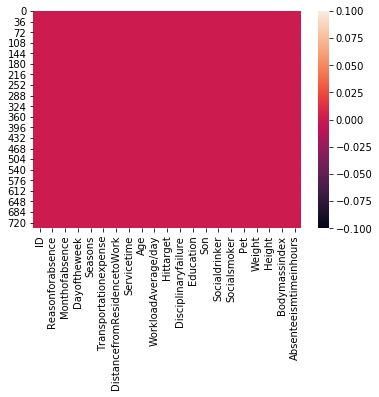

In [8]:
# check missing values
sns.heatmap(df.isnull())

it shows no null value present 

# EDA - Analyse the data set stats using plots

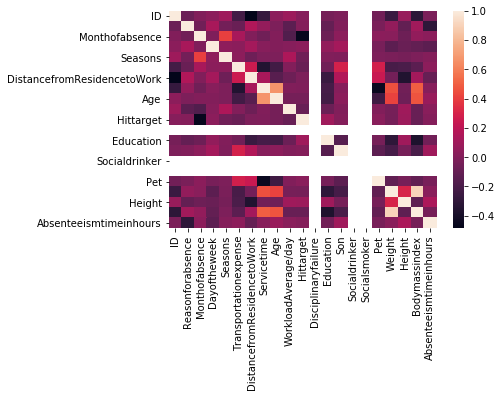

In [9]:
# checking correlation using heatmap

dfcor=df.corr()
sns.heatmap(dfcor)

Above plot shows that column name 'Transportation expense','Distance from Residence to Work' are less correlated ,however column name 'Service time',
'Age' are correlated & correlation exist between column  'Weight','Height'.

In [10]:
# Checking for skewness for each of the column
df.skew()

ID                             0.016606
Reasonforabsence              -0.909478
Monthofabsence                 0.075290
Dayoftheweek                   0.102440
Seasons                       -0.038532
Transportationexpense          0.396189
DistancefromResidencetoWork    0.312083
Servicetime                   -0.004720
Age                            0.697703
WorkloadAverage/day            0.961457
Hittarget                     -1.261708
Disciplinaryfailure            0.000000
Education                      2.108953
Son                            2.109392
Socialdrinker                  0.000000
Socialsmoker                   0.000000
Pet                            4.066262
Weight                         0.017001
Height                         2.566060
Bodymassindex                  0.305046
Absenteeismtimeinhours         5.783930
dtype: float64

Skewness exist in all below columns ; Column name - Work load Average/day , Disciplinary failure , Education , Son , Social smoker , Pet , Height ,Absenteeism time in hours

# Data Visualization-Univariate

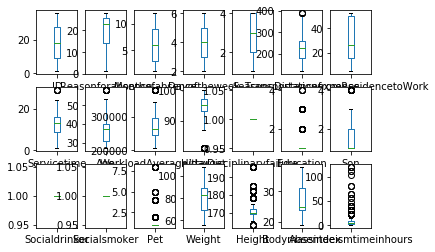

In [17]:
# Visualization - box and whisker plots - Univariate Analysis
df.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
plt.show()

As per above graph all below column have outliers - 'Education',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Absenteeism time in hours'

# Data Visualization-Multivariate

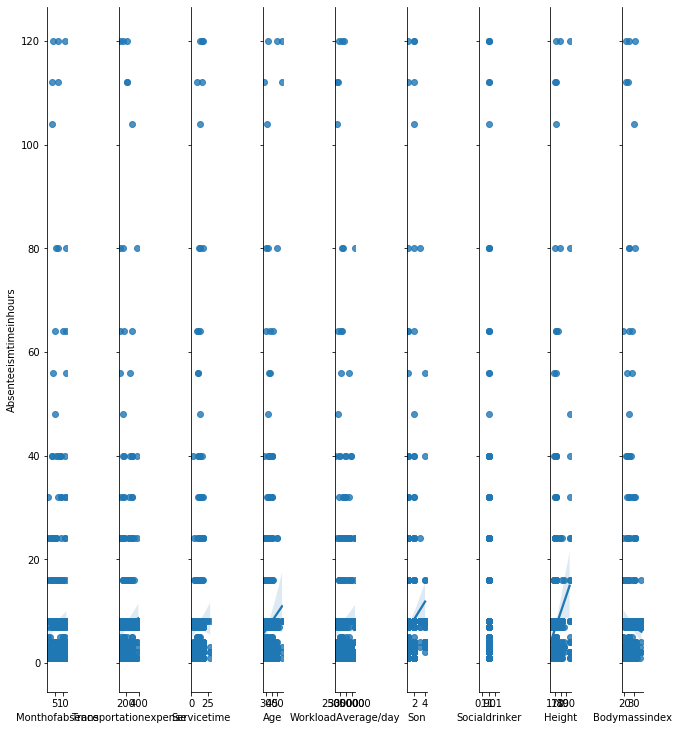

In [18]:
# draw Scatter plot for linear regression

sns.pairplot(df, x_vars=['Monthofabsence','Transportationexpense','Servicetime','Age','WorkloadAverage/day','Son','Socialdrinker','Height','Bodymassindex'], y_vars='Absenteeismtimeinhours', size=10, aspect=0.1, kind='reg')
plt.show()

multivariate analysis shows that below columns having positive linear relation & rest column having negative linear relation-  'Month of absence',
 'Transportation expense',
 'Service time', 
 'Age',
 'Work load Average/day '
 'Son',
 'Social drinker',
 'Social smoker',
 'Weight',
 'Height'

# Preparing X & Y for Regression model 

In [19]:
import pandas as pd
x = df[['ID',
 'Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Transportationexpense',
 'DistancefromResidencetoWork',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet',
 'Weight',
 'Height',
 'Bodymassindex']]
y = df.Absenteeismtimeinhours        # y is a vector, hence we use dot to access 'label'

In [20]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(740, 20)


In [21]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(740,)


In [22]:
# Split data using train_test_split method

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.10)

In [23]:
# Interpreting model coefficients
# print the intercept and coefficients

from sklearn.model_selection import train_test_split
# Linear regression in scikit-learn

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

92.2239770865012
[-1.83861281e-01 -5.13177725e-01  3.93660363e-02 -8.58281180e-01
  4.71041048e-01 -3.26314805e-03 -4.80715833e-02 -3.29012183e-01
  4.01338998e-01 -4.72058342e-06  9.04256901e-02  4.44089210e-15
 -2.50735450e+00  1.24636993e+00 -6.66133815e-16  0.00000000e+00
 -7.06001810e-01  8.10384162e-01 -4.39414252e-01 -2.65523429e+00]


In [24]:
# make predictions on the testing set
y_pred = linreg.predict(x_test)

In [25]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)    
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.05444877396229495
1.0


In [26]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(x_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002190956CE08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.05444322138317994
0.9877856165252731


In [27]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  6.313079634854043
Mean Sqr Error:    210.30338591996684
Root mean sqr error:  14.50184077694852


In [28]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.1)
    regrn = linear_model.LinearRegression()
    regrn.fit(x_train,y_train)
    y_pred = regrn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 86  is  0.3973951546762855


In [29]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

-827244.132833794
-0.061844546967241294
-0.06034007656352114


In [30]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split

# we can officially put values as 0.001,0.01,0.1,1.0 for alpha
# will reduce the coefficient to zero (those feature are not informative)
# Default value of alpha = 1.0
# alpha =0.01

ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train) 
ls.score(x_train,y_train)

train_score=ls.score(x_train, y_train)
test_score=ls.score(x_test, y_test)

ls.coef_

print ("linear lasso train score:", train_score)
print ("linear lasso test score:", test_score)


linear lasso train score: 0.1514276234940257
linear lasso test score: 0.12017285581230308


In [31]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train) 
rd.score(x_train,y_train)


Ridge_train_score=ls.score(x_train, y_train)
Ridge_test_score=ls.score(x_test, y_test)

ls.coef_

print ("Ridge train score:", Ridge_train_score)
print ("Ridge test score:", Ridge_test_score)


Ridge train score: 0.1514276234940257
Ridge test score: 0.12017285581230308


In [32]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

# ElasticNet is a combination of both Lasso & Ridge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

enr=ElasticNet(alpha=0.001)
enr=ElasticNet()
enr.fit(x_train,y_train)


El_train_score=ls.score(x_train, y_train)
El_test_score=ls.score(x_test, y_test)

ls.coef_

print ("EL train score:", El_train_score)
print ("EL test score:", El_test_score)

EL train score: 0.1514276234940257
EL test score: 0.12017285581230308


In [33]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(x_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 12.02 %


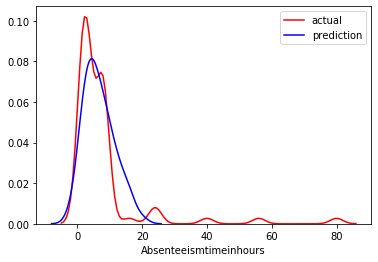

In [34]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-Absenteeism at work place gives these score -> Accuracy Score = 40% ; Test Score = 12%
Model suffering from underfitting here even after applying cross validation.